In [27]:
import numpy as np
import jax
jax.config.update("jax_enable_x64", True)
import jax.random as jr
import jax.numpy as jnp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.gaussian_process.kernels import RBF, DotProduct, Matern, WhiteKernel, ConstantKernel
from sklearn.gaussian_process import GaussianProcessRegressor

In [28]:
# %% Visualize some predictions
def plot_truth_vs_prediction(truth, prediction, x):
    plt.figure(figsize=(12, 5))
    plt.plot(x, truth, label='Truth', color='blue')
    plt.plot(x, prediction, label='Prediction', color='red', linestyle='--')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Truth vs Prediction')
    plt.legend()
    plt.grid()
    plt.show()

# Viscous Burgers equation


\begin{align}
&\frac{\partial u}{\partial t} = \Delta u - u \frac{\partial u}{\partial x} 
 \\
&u(0,x)  = u_0(x)
\end{align}

(periodic boundary conditions). 

We aim to learn the solution/flow operator:

$$
\mathcal{S}: u_0 \mapsto u(T,x)
$$

The initial condition is drawn from 

$$
u_0 \sim \mathcal N(0, (-\Delta + I)^{-s})
$$

## Load and plot the data

In [ ]:
folder = "data/burgers/"
from scipy.io import loadmat

data = loadmat(folder + "burgers_data_R10.mat")

print(data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'a', 'a_smooth', 'a_smooth_x', 'a_x', 'u'])


In [30]:
u0 = data['a']  # shape (N_samples, N_space)
uT  = data['u']  # shape (N_samples, N_space)

In [32]:
x = np.linspace(0, 1, u0.shape[1])
downsample_factor = 2 ** 6
x = x[::downsample_factor]
u0 = u0[:, ::downsample_factor]
uT = uT[:, ::downsample_factor]

In [33]:
N = u0.shape[0]
n_train = int(0.8 * N)
u0_train = u0[:n_train,:]
uT_train = uT[:n_train,:]
u0_test = u0[n_train:,:]
uT_test = uT[n_train:,:]
print(u0_train.shape, uT_train.shape, u0_test.shape, uT_test.shape)

(1638, 128) (1638, 128) (410, 128) (410, 128)


## Input/output plot

In [1]:
## TODO: Plot a an initial and final condition from the dataset

# Write me

# Encoder-Decoder

## Input

In [ ]:
# TODO: Plot the decay of the PCA modes for the input data
# Hint : use sklearn.decomposition.PCA

In [ ]:
# TODO: plot the first 5 PCA modes for the input data
# Hint : use pca_input.components_


## Output

In [ ]:
# TODO: Plot the decay of the PCA modes for the output data
# Hint : use sklearn.decomposition.PCA

In [ ]:
# TODO: plot the first 5 PCA modes for the output data
# Hint : use pca_output.components_


# Build a operator 

In [ ]:
# TODO: Define the encoders
# Hit : you can use sklearn.decomposition.PCA or not use any encoder!

# encoder_input = ...
# encoder_output = ...

# TODO: project (or not)
# u0_train_proj = ...
# uT_train_proj = ...


In [4]:
# TODO: define the vector valued GPR model (or any other regression model you like)
# hint: you can use sklearn.gaussian_process.GaussianProcessRegressor

# f = ...

# f.fit(u0_train_proj,uT_train_proj)

In [ ]:
# Predict on test data
# u0_test_proj = ... # encode
# uT_test_pred = f.predict(u0_test_proj) # predict
# pred_test = ... # decode

# Compute relative L2 error on test set
# test_error = jnp.linalg.norm(uT_test - pred_test) / jnp.linalg.norm(uT_test)
# print("Test relative L2 error: ", test_error)

Test relative L2 error:  0.04091543773109654


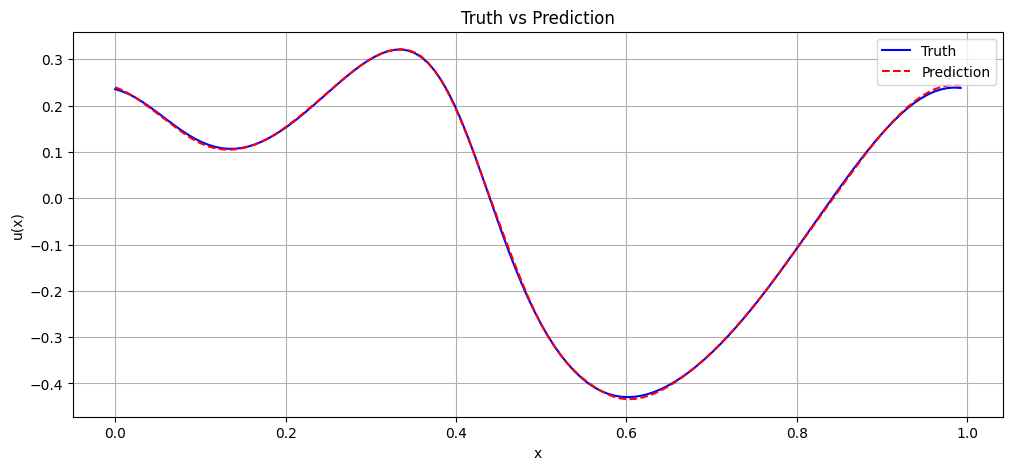

In [42]:
# Plot a prediction
idx = 0  # index of the test sample to plot
plot_truth_vs_prediction(uT_test[idx,:], pred_test[idx,:], x)

# Uncertainty quantification
If you have used a GP, then 
$$
f(u_i) \in \mathbb{R}^n \sim \mathcal{N}(\mu, \bold{C})
$$
The reconstruction operator $\chi(f(u_i)) = W^\intercal f(u_i)$ which implies that 

$$
\chi(f(u_i)) \sim \mathcal{N}(W^\intercal \mu, W^\intercal\bold{C}W)
$$

(note that when using a diagonal kernel, $\bold{C}$ is diagonal)

In [ ]:
# TODO: Uncertainty quantification
idx = -1
# u0_test_proj =...  # encode a single test input

# Example with GPR
# mean, std = f.predict(u0_test_proj, return_std = True) # predict 

# mean_decoded =... # decode mean
# std_decoded = ... # decode std


# Create upper and lower bounds for uncertainty
# uppper = mean_decoded.flatten() +  std_decoded
# lower = mean_decoded.flatten() - std_decoded

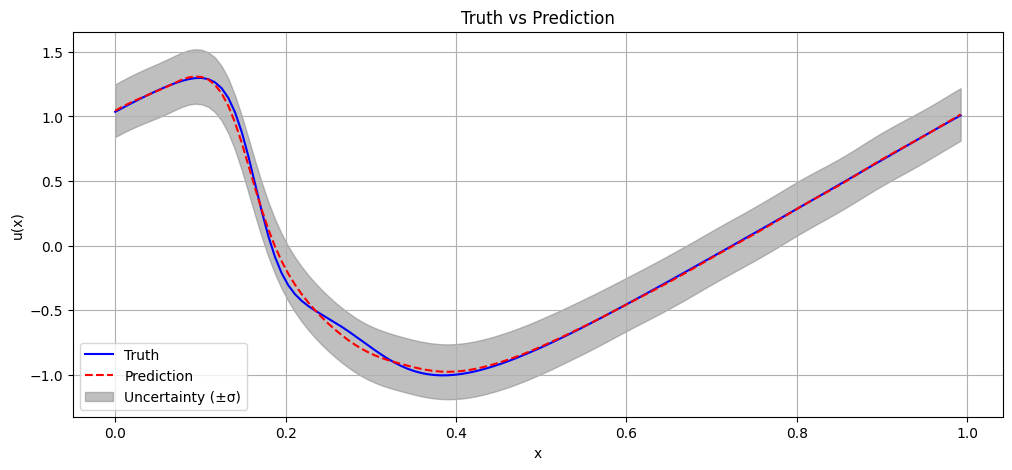

In [ ]:
# Plot with uncertainty
plt.figure(figsize=(12, 5))
plt.plot(x, uT_test[idx], label='Truth', color='blue')
plt.plot(x, mean_decoded, label='Prediction', color='red', linestyle='--')
plt.fill_between(x, lower, uppper, color='gray', alpha=0.5, label='Uncertainty (±σ)')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Truth vs Prediction')
plt.legend()
plt.grid()
plt.show()